# Gradient descent for linear regression algorithm
這段code實現了簡單線性回歸的梯度下降算法，用來最小化loss function，通過多次迭代來找到最佳的斜率 m 和截距 b

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 計算對應於 b (截距) 的梯度
def get_gradient_at_b(x, y, b, m):
  N = len(x)  # 資料點的數量
  diff = 0
  # 計算每個資料點的差異並累加
  for i in range(N):
    x_val = x[i]  # 取得 x 的值
    y_val = y[i]  # 取得 y 的值
    diff += (y_val - ((m * x_val) + b))  # y - (mx + b)
  # 返回梯度值，對 b 進行優化
  b_gradient = -(2/N) * diff  
  return b_gradient

# 計算對應於 m (斜率) 的梯度
def get_gradient_at_m(x, y, b, m):
  N = len(x)  # 資料點的數量
  diff = 0
  # 計算每個資料點的差異並累加
  for i in range(N):
      x_val = x[i]  # 取得 x 的值
      y_val = y[i]  # 取得 y 的值
      diff += x_val * (y_val - ((m * x_val) + b))  # x * (y - (mx + b))
  # 返回梯度值，對 m 進行優化
  m_gradient = -(2/N) * diff  
  return m_gradient

# 更新 b 和 m 的值，進行一次梯度下降步驟
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)  # 計算對 b 的梯度
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)  # 計算對 m 的梯度
    # 使用學習率更新 b 和 m 的值
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return b, m  # 返回更新後的 b 和 m

# 主函數：運行梯度下降進行多次迭代
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0  # 初始化截距 b
  m = 0  # 初始化斜率 m
  # 執行 num_iterations 次梯度下降
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)  # 更新 b 和 m
  return b, m  # 返回最終計算的 b 和 m

In [2]:
# 'months' 是自變量 (x)，'revenue' 是依變量 (y)
months = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]).reshape(-1,1)
revenue = np.array([52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]).reshape(-1,1)

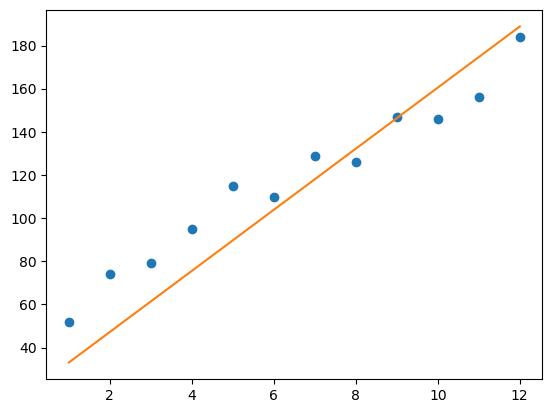

In [3]:
# 使用梯度下降法來尋找線性回歸模型的最佳參數 (b 和 m)
# 0.01 是學習率，100 是梯度下降法的迭代次數
b, m = gradient_descent(months, revenue, 0.01, 100)

# 根據優化後的參數 (b 和 m) 來預測收入
# 對於每一個 'months' 的值，使用線性回歸公式 (y = mx + b) 來預測收入
revenue_pred = [x * m + b for x in months]

# 畫出原始數據（月份 vs. 收入）作為點 ('o')
plt.plot(months, revenue, 'o')

# 畫出根據線性回歸模型預測的收入作為線 ('-')
plt.plot(months, revenue_pred, '-')

# 顯示圖表
plt.show()

# Linear regression using Scikit-Learn

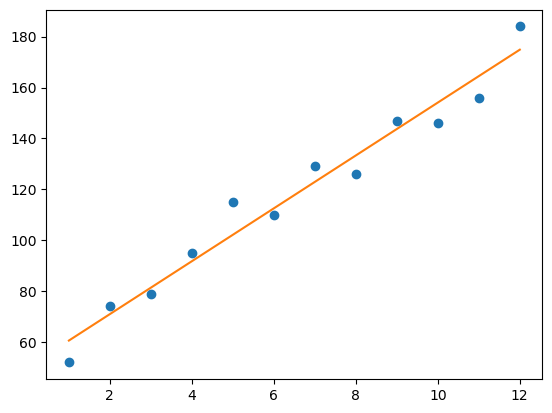

In [4]:
from sklearn.linear_model import LinearRegression

# 建立一個線性回歸模型的實例
line_fitter = LinearRegression()

# 使用 scikit-learn 的線性回歸模型來擬合數據
# 'months' 是自變量 (x)，'revenue' 是目標變量 (y)
line_fitter.fit(months, revenue)

# 使用訓練好的線性回歸模型，對新數據 'x' 進行預測
# 預測的結果存儲在 'revenue_pred' 中
revenue_pred2 = line_fitter.predict(months)

# 畫出原始數據（月份 vs. 收入）作為點 ('o')
plt.plot(months, revenue, 'o')

# 畫出根據線性回歸模型預測的收入作為線 ('-')
plt.plot(months, revenue_pred2, '-')

# 顯示圖表
plt.show()

# Stochastic gradient descent(SGD)隨機梯度下降

Model Coefficients: [  12.82374492 -175.83897977  461.55017141  289.58558557  -32.48593899
  -93.4852095  -202.5949084   130.06743425  384.89779094  124.07210036]
R^2 Score: 0.5074630523967589


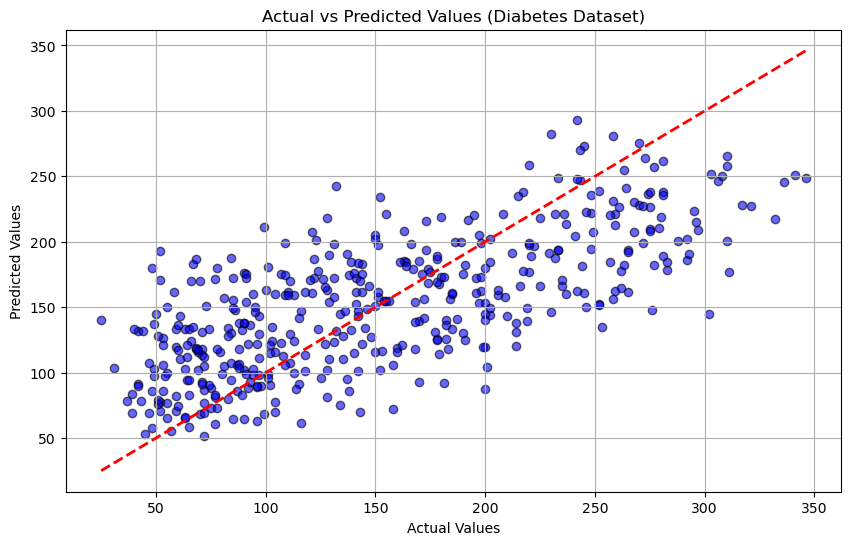

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import SGDRegressor

# 使用 sklearn 的 load_diabetes 函數獲取糖尿病數據集
X, y = load_diabetes(return_X_y=True)

# 創建隨機梯度下降 (SGD) 的線性回歸模型
sgd = SGDRegressor(max_iter=10000)

# 將模型擬合到數據集上
sgd.fit(X, y)

# 輸出模型的回歸係數
print("Model Coefficients:", sgd.coef_)

# 輸出 \( R^2 \) 決定係數
r2_score = sgd.score(X, y)
print("R^2 Score:", r2_score)

# 使用模型預測
y_pred = sgd.predict(X)

# 繪製實際值和預測值的比較圖
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.6, color="blue", edgecolor="k")
plt.plot([min(y), max(y)], [min(y), max(y)], color="red", linewidth=2, linestyle="--")  # 理想線
plt.title("Actual vs Predicted Values (Diabetes Dataset)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()

# Multiple Linear Regression (MLR)

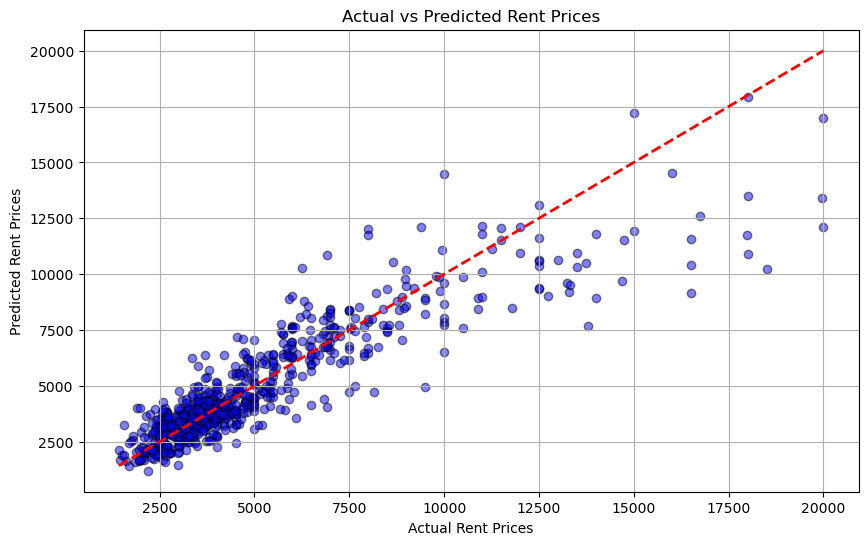

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. 載入數據集
streeteasy = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")

# 2. 將數據轉換為 DataFrame 以方便操作
df = pd.DataFrame(streeteasy)

# 3. 定義預測變數（X）和目標變數（y）
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 
         'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 
         'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]

# 4. 將數據分為訓練集和測試集
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

# 5. 初始化線性迴歸模型
mlr = LinearRegression()

# 6. 使用訓練集訓練模型
mlr.fit(x_train, y_train)

# 7. 使用訓練好的模型預測測試集的租金價格
y_predict = mlr.predict(x_test)

# 8. 繪製散點圖比較實際值與預測值
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict, alpha=0.5, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)

# 添加標籤與標題
plt.title("Actual vs Predicted Rent Prices")
plt.xlabel("Actual Rent Prices")
plt.ylabel("Predicted Rent Prices")
plt.grid(True)

# 顯示圖表
plt.show()

In [7]:
# Sonny 沒有電梯，因此第 11 個項目設為 0
sonny_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]

# 使用訓練好的模型預測 Sonny 公寓的租金
predict = mlr.predict(sonny_apartment)

# 輸出預測的租金
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2393.58


/Users/benson/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
import datetime

current_date = datetime.datetime.now().strftime("%Y年%m月%d日")
print(f"更新日期: {current_date}")

更新日期: 2024年11月30日
